# Importando os dados

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount pra acessar os dados do drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
path_train = '/content/drive/MyDrive/ColabNotebooks/Aprendizado de maquina 2021;1/trab2/train_car_details.csv'
path_test = '/content/drive/MyDrive/ColabNotebooks/Aprendizado de maquina 2021;1/trab2/test_car_details.csv'

# Carregando o treino
df = pd.read_csv(path_train)
df = df.drop('Id', axis=1)
# Carregando o teste
df_test = pd.read_csv(path_test)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
1,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0
2,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62 kmpl,1995 CC,187.74 bhp,400Nm@ 1750-2500rpm,5.0
3,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0
4,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.5 kmpl,2982 CC,171 bhp,343Nm@ 1400-3400rpm,7.0


# Explorando os dados

nada demais aqui, só plots aleatórios pra entender o que era o dataset


In [ ]:

# Bibliotecas de visualizacao
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
#  Configurando previamente o sns
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

In [ ]:
df.groupby(['seller_type'])['selling_price'].mean()

seller_type
Dealer              1.419719e+06
Individual          4.916481e+05
Trustmark Dealer    8.371210e+05
Name: selling_price, dtype: float64

In [ ]:
# Cria uma lista de nomes das features categóricas
categorical_features = (df.select_dtypes(include='object').columns).tolist()
categorical_features

# Desses presentes só os 'fuel', 'seller_type', 'transmission', 'owner', são simples de lidar, o resto vai necessitar de tratamento de strings

['name',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque']

## year

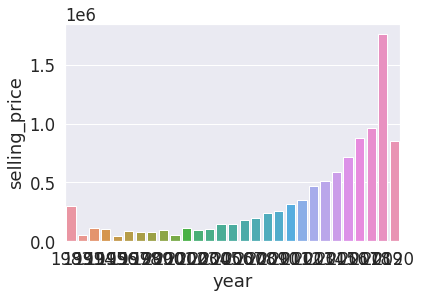

In [ ]:
# Checando a média do valor dos carros das classes de year
year_mean = df.groupby('year', as_index=False)['selling_price'].mean().round(decimals=2).sort_values(by=['selling_price'])
year_plot = sns.barplot(x='year', y='selling_price', data=year_mean)

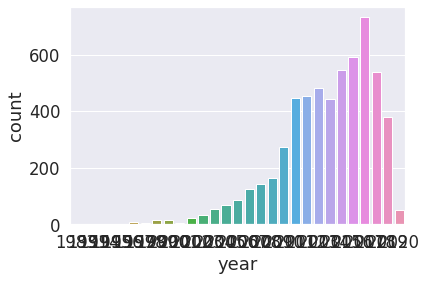

In [ ]:
# Plotando a contagem do numero de tipos de year
sns.countplot(df['year'], data=df)

O ano de 2019 está estranho, o que faz sentido já que são revenda de carros e preços podem estar sendo afetados por n motivos.

O mesmo vale para 2020 e ter poucos carros, porque o dataset foi retirado em 2020


## km_driven

In [ ]:
np.log10(df['km_driven']).describe()

count    5689.000000
mean        4.719762
std         0.378968
min         0.000000
25%         4.544068
50%         4.778151
75%         4.991226
max         6.176091
Name: km_driven, dtype: float64

## fuel

Primeiro lidando com a calsse fuel e decidindo o que fazer com ela


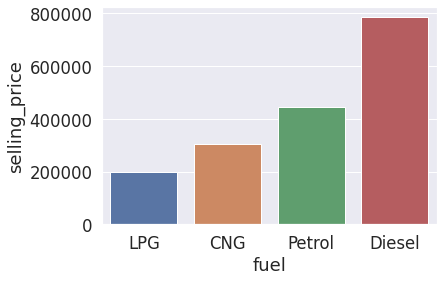

In [ ]:
# Checando a preço médio dos carros das classes de fuel
fuel_mean = df.groupby('fuel', as_index=False)['selling_price'].mean().round(decimals=2).sort_values(by=['selling_price'])
fuel_plot = sns.barplot(x='fuel', y='selling_price', data=fuel_mean)

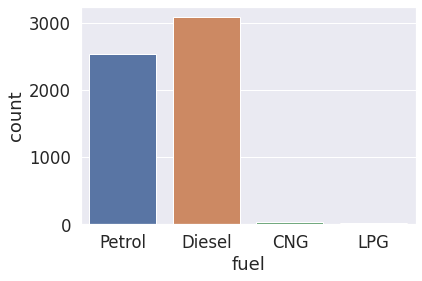

In [ ]:
# Plotando quantos carro tem pra cada tipo de fuel
sns.countplot(df['fuel'], data=df)

In [ ]:
# Checando os valores absolutos de números de carro de cada fuel
df['fuel'].value_counts()

Diesel    3082
Petrol    2540
CNG         41
LPG         26
Name: fuel, dtype: int64

Desse ponto já da pra ver que há hierarquia entre as classes de fuel em relação a preço e preferência, portanto vai ser um label encode simples.


In [ ]:
df[df['fuel'] == 'CNG'].describe()

,year,selling_price,km_driven,seats
count,41.000000,41.000000,41.000000,40.000000
mean,2014.707317,304999.926829,67763.439024,5.050000
std,4.178779,110381.063820,51526.221382,0.638508
min,2000.000000,80000.000000,1.000000,4.000000
25%,2012.000000,211000.000000,35000.000000,5.000000
50%,2016.000000,325000.000000,60000.000000,5.000000
75%,2018.000000,380000.000000,90000.000000,5.000000
max,2020.000000,545000.000000,270000.000000,8.000000


In [ ]:
df[df['fuel'] == 'LPG'].describe()

,year,selling_price,km_driven,seats
count,26.000000,26.000000,26.000000,23.0
mean,2009.192308,197000.000000,91485.230769,5.0
std,4.858141,85214.552748,51825.682625,0.0
min,1991.000000,55000.000000,30000.000000,5.0
25%,2008.000000,119500.000000,67333.000000,5.0
50%,2011.000000,195500.000000,82000.000000,5.0
75%,2012.000000,275000.000000,100000.000000,5.0
max,2015.000000,350000.000000,300000.000000,5.0


As duas classes CNG e LPG não fazem sentido se manterem separadas, só tem 62 instâncias e elas estão bem próximas em preço e época de fabriacação, portando devem ser concatenadas mais pra frente.

## seller_type

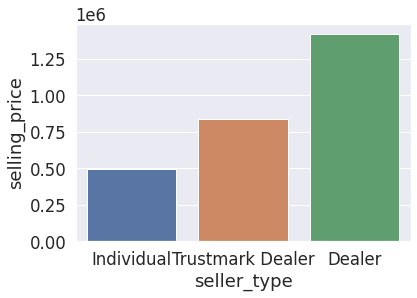

In [ ]:
# Checando a média do valor dos carros das classes de seller_type
seller_type_mean = df.groupby('seller_type', as_index= False)['selling_price'].mean().round(decimals=2).sort_values(by=['selling_price'])
seller_type_plot = sns.barplot(x='seller_type', y='selling_price', data=seller_type_mean)

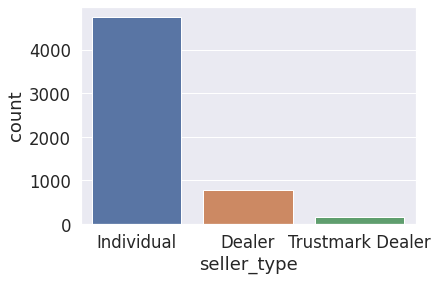

In [ ]:
# Plotando a contagem do numero de tipos de seller_type
sns.countplot(df['seller_type'], data=df)

## transmission

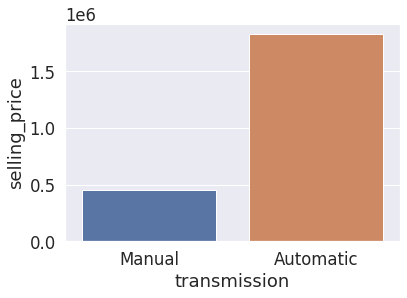

In [ ]:
# Checando a média do valor dos carros das classes de transmission
transmission_mean = df.groupby('transmission', as_index= False)['selling_price'].mean().round(decimals=2).sort_values(by=['selling_price'])
transmission_plot = sns.barplot(x='transmission', y='selling_price', data=transmission_mean)

In [ ]:
transmission_mean

,transmission,selling_price
1,Manual,452328.75
0,Automatic,1827136.34


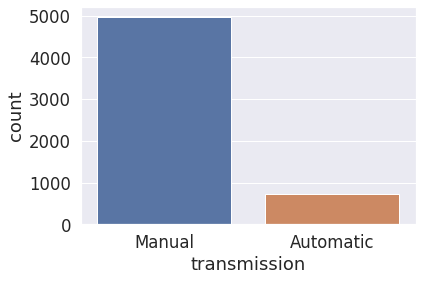

In [ ]:
# Plotando a contagem do numero de tipos de transmission
sns.countplot(df['transmission'], data=df)

## owner

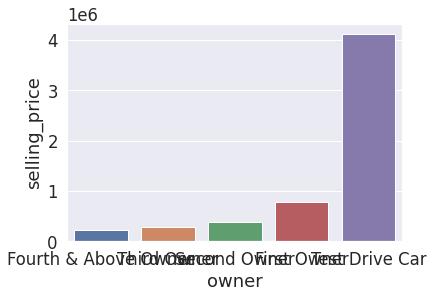

In [ ]:
# Checando a preço médio dos carros das classes de owner
owner_mean = df.groupby('owner', as_index=False)['selling_price'].mean().round(decimals=2).sort_values(by=['selling_price'])
owner_plot = sns.barplot(x='owner', y='selling_price', data=owner_mean)

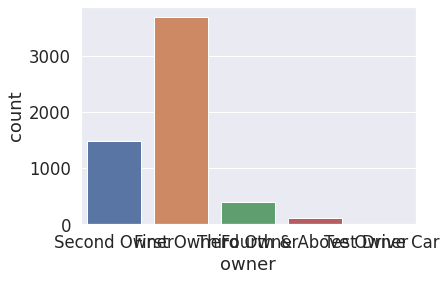

In [ ]:
# Plotando quantos carro tem pra cada tipo de owner
sns.countplot(df['owner'], data=df)

In [ ]:
# Checando os valores absolutos de números de carro de cada owner
df['owner'].value_counts()

First Owner             3685
Second Owner            1488
Third Owner              396
Fourth & Above Owner     118
Test Drive Car             2
Name: owner, dtype: int64

Label encode simples, mas descobrir o que fazer com a classe
Test Drive Car

In [ ]:
# Considerando dar merge com o First owner
df[df['owner'] == 'Test Drive Car'].describe()

,year,selling_price,km_driven,seats
count,2.0,2.000000e+00,2.000000,2.0
mean,2019.0,4.111500e+06,16328.500000,5.0
std,0.0,2.986112e+06,12061.120367,0.0
min,2019.0,2.000000e+06,7800.000000,5.0
25%,2019.0,3.055750e+06,12064.250000,5.0
50%,2019.0,4.111500e+06,16328.500000,5.0
75%,2019.0,5.167250e+06,20592.750000,5.0
max,2019.0,6.223000e+06,24857.000000,5.0


In [ ]:
df[df['owner'] == 'First Owner'].describe().round()

,year,selling_price,km_driven,seats
count,3685.0,3685.0,3685.0,3631.0
mean,2015.0,770622.0,57938.0,5.0
std,3.0,902487.0,49419.0,1.0
min,1995.0,35000.0,1000.0,2.0
25%,2013.0,340000.0,25000.0,5.0
50%,2016.0,550000.0,50000.0,5.0
75%,2017.0,750000.0,80000.0,5.0
max,2020.0,7200000.0,1500000.0,10.0


In [ ]:
df[df['owner'] == 'Second Owner'].describe().round()

,year,selling_price,km_driven,seats
count,1488.0,1488.0,1488.0,1430.0
mean,2012.0,392153.0,88637.0,5.0
std,4.0,333738.0,46040.0,1.0
min,1991.0,35000.0,2000.0,4.0
25%,2010.0,185000.0,60000.0,5.0
50%,2012.0,310000.0,80000.0,5.0
75%,2014.0,500000.0,110000.0,5.0
max,2020.0,3000000.0,500000.0,10.0


# Limpando os dados

In [ ]:
# Criando cópia do dataset orignal
df_processed = df.copy()

## Removendo instâncias vazias

In [ ]:
# Checando se tem dados faltando
df_processed.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          157
engine           157
max_power        151
torque           158
seats            157
dtype: int64

In [ ]:
# Removendo as linhas (instances) que tem dados faltantes
def clean_na(df):
  df = df_processed.dropna(axis=0)
  return df
df_processed = clean_na(df_processed)

In [ ]:
# Checando se ainda tem dados faltando
df_processed.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

## Estruturando dados numéricos que estavam como string

In [ ]:
# name
def clean_name(df):
  df['name'] = df['name'].str.split().str[0]
  return df

# mileage
def clean_mileage(df):
  if df['mileage'].dtypes == float:
    return df
    
  converted_mileage = []

  for mileage in df.loc[:, 'mileage']:
      
      if 'km/kg' in str(mileage):
          mileage = mileage[:-5]
          mileage = float(mileage)*1.40
          converted_mileage.append(float(mileage))
          
      elif 'kmpl' in str(mileage):
          mileage = mileage[:-5]
          converted_mileage.append(float(mileage))

  df.loc[:, 'mileage'] = converted_mileage
  
  return df

# engine
def clean_engine(df):
  import re
  if df['engine'].dtypes == int:
    return df

  df['engine'] = pd.to_numeric(df['engine'].str.split().str[0])
  df['engine']
  return df

# max_power
def clean_max_power(df):
  if df['max_power'].dtypes == float:
    return df
  df['max_power'] = pd.to_numeric(df['max_power'].str.split().str[0])
  df['max_power']
  return df

def clean_torque(df):
  import re
  
  if df['torque'].dtypes == int:
      return df

  converted_torque = []

  df['torque'] = df['torque'].str.split().str[0]


  for string in df['torque']:
    converted_torque.append(int(re.search(r'\d+', string).group()))

  df['torque'] = converted_torque
  
  return df


df_processed = clean_name(df_processed)

df_processed = clean_mileage(df_processed)

df_processed = clean_engine(df_processed)

df_processed = clean_max_power(df_processed)

df_processed = clean_torque(df_processed)

In [ ]:
df_processed.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1,Maruti,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77,1248,88.76,200,7.0
2,BMW,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62,1995,187.74,400,5.0
3,Tata,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57,2179,138.10,320,7.0
4,Toyota,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.50,2982,171.00,343,7.0
5,Maruti,2010,180000,25000,Petrol,Individual,Manual,Second Owner,19.70,796,46.30,62,5.0


# Feature engineering

In [ ]:
df_feature = df_processed.copy()

In [ ]:
df_feature

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1,Maruti,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77,1248,88.76,200,7.0
2,BMW,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62,1995,187.74,400,5.0
3,Tata,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57,2179,138.10,320,7.0
4,Toyota,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.50,2982,171.00,343,7.0
5,Maruti,2010,180000,25000,Petrol,Individual,Manual,Second Owner,19.70,796,46.30,62,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,Hyundai,2017,550000,20000,Petrol,Individual,Manual,First Owner,18.90,1197,82.00,114,5.0
5685,Renault,2013,360000,81000,Diesel,Individual,Manual,Second Owner,19.01,1461,108.45,248,5.0
5686,Maruti,2011,310000,70000,Diesel,Individual,Manual,Second Owner,19.30,1248,73.90,190,5.0
5687,Maruti,2015,650000,57000,Diesel,Dealer,Manual,First Owner,23.65,1248,88.50,200,5.0


In [ ]:
len(set(df_feature['name']))

30

In [ ]:
df_feature['name'].value_counts()/df_feature.shape[0]

Maruti           0.297776
Hyundai          0.172663
Mahindra         0.097089
Tata             0.090942
Toyota           0.058760
Honda            0.058398
Ford             0.049177
Chevrolet        0.030555
Renault          0.029651
Volkswagen       0.023323
BMW              0.014826
Skoda            0.012837
Nissan           0.009582
Jaguar           0.009402
Datsun           0.008317
Volvo            0.007774
Mercedes-Benz    0.005966
Audi             0.005243
Fiat             0.004520
Jeep             0.004158
Lexus            0.003435
Mitsubishi       0.001627
Force            0.000904
Land             0.000723
Daewoo           0.000542
Kia              0.000542
MG               0.000542
Isuzu            0.000362
Ambassador       0.000181
Ashok            0.000181
Name: name, dtype: float64

In [ ]:
(df_feature['name'].value_counts()/df_feature.shape[0])[:10].sum()

#aqui caso necessauro

0.9083348399927681

## One hot encoding 
(fuel, seller_type, transmission, owner)

### Dando merge em algumas classes do fuel e owner

In [ ]:
def merge_fuel(df):
  dic = {'CNG': 'Other', 'LPG': 'Other'}
  df = df.replace({'fuel': dic})
  return df

def merge_owner(df):
  df = df.replace('Test Drive Car', 'First Owner')
  return df

df_feature = merge_owner(df_feature)

df_feature = merge_fuel(df_feature)

In [ ]:
print(set(df_feature['owner']), set(df_feature['fuel']))

{'Fourth & Above Owner', 'Second Owner', 'Third Owner', 'First Owner'} {'Other', 'Diesel', 'Petrol'}


### criando o encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoded_features = ['fuel', 'seller_type', 'transmission', 'owner']

encoder = OneHotEncoder(drop='first', sparse=False)
data_hot_encoded = encoder.fit_transform(df_feature[encoded_features])
data_hot_encoded = pd.DataFrame(data_hot_encoded, index=df_feature[categorical_features].index)


df_feature = df_feature.drop(encoded_features, axis=1)

df_feature = pd.concat([df_feature, data_hot_encoded], axis=1)

In [ ]:
df_feature

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,0,1,2,3,4,5,6,7
1,Maruti,2012,459999,87000,20.77,1248,88.76,200,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,BMW,2010,1100000,102000,19.62,1995,187.74,400,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tata,2009,229999,212000,11.57,2179,138.10,320,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,Toyota,2010,800000,125000,11.50,2982,171.00,343,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,Maruti,2010,180000,25000,19.70,796,46.30,62,5.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,Hyundai,2017,550000,20000,18.90,1197,82.00,114,5.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5685,Renault,2013,360000,81000,19.01,1461,108.45,248,5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5686,Maruti,2011,310000,70000,19.30,1248,73.90,190,5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5687,Maruti,2015,650000,57000,23.65,1248,88.50,200,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Lidando com o name

In [ ]:
# Transformando o nome em valor numérico
# def transform_name(df, df_train):

car_prices = dict(df_feature.groupby('name')['selling_price'].mean())
df_feature.replace(car_prices, inplace=True)

In [ ]:
df_feature.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,0,1,2,3,4,5,6,7
1,4.032081e+05,2012,459999,87000,20.77,1248,88.76,200,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,4.193171e+06,2010,1100000,102000,19.62,1995,187.74,400,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.646724e+05,2009,229999,212000,11.57,2179,138.10,320,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.019043e+06,2010,800000,125000,11.50,2982,171.00,343,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,4.032081e+05,2010,180000,25000,19.70,796,46.30,62,5.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


# modelo

In [ ]:
df_final = df_feature.copy()

In [ ]:
df_final.head()

## spliting data

In [ ]:
y = df_final['selling_price']

X = df_final.drop('selling_price', axis=1)

from sklearn.model_selection import train_test_split
# Divide entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## RFECV + xgboost

In [ ]:
# Remove features redundantes
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [ ]:
model = xgb.XGBRegressor(verbosity = 0)
selector = RFECV(model, step=1, cv=10, scoring='r2')
selector.fit(X, y)
# Recursive feature elimination result:
X_fs = selector.transform(X)

In [ ]:
# comentado pra não rodar toda vez querodar o notebook todo
# parameters =  {'eta': [0.1], 'learning_rate': [0.1], 'max_depth': [8], 'min_child_weight': [0.1], 'n_estimators': [300, 500, 700, 900], 'reg_lambda': [10.0], 'subsample': [1.0]}

# Grid search
parameters = {
            'eta': [0.1, 0.2, 0.3],
            'max_depth' : [8, 10],
            'min_child_weight': [0.1, 0.3, 0.5],
            'reg_lambda': [10.0, 20.0, 30, 40],
            'learning_rate': [0.2, 0.1],
            'n_estimators': [300, 350, 450],
            'subsample': [1.0, 0.5],
 }
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='r2', cv=10 )
grid_search.fit(X_fs, y)
best_r2 = grid_search.best_score_
best_params = grid_search.best_params_

print("Best r2: {:.2f} %".format(best_r2*100))
print("Best params: ", best_params)

# Envio


In [ ]:
ids = df_test['Id'].copy()
df_envio = df_test.drop('Id', axis=1).copy()

In [ ]:
df_envio.head()

## Estruturando dados numéricos que estavam em strings

In [ ]:
df_envio = clean_name(df_envio)

df_envio = clean_mileage(df_envio)

df_envio = clean_engine(df_envio)

df_envio = clean_max_power(df_envio)

df_envio = clean_torque(df_envio)

In [ ]:
df_envio.head()

## one hot encoding

In [ ]:
# Dando merge em algumas classes do fuel e owner
df_envio = merge_owner(df_envio)

df_envio = merge_fuel(df_envio)

In [ ]:
encoded_features = ['fuel', 'seller_type', 'transmission', 'owner']

# encoding
data_hot_encoded = encoder.transform(df_envio[encoded_features])
data_hot_encoded = pd.DataFrame(data_hot_encoded, index=df_envio[categorical_features].index)

# drop endoded features
df_envio = df_envio.drop(encoded_features, axis=1)

# merge encoded features
df_envio = pd.concat([df_envio, data_hot_encoded], axis=1)

## name

In [ ]:
df_processed['name'].value_counts()

In [ ]:
# Substitui o único carro diferente pelo carro mais comum
# se houvessem mais carros compensaria usar um kmeans pra 
# classificar melhor as marcas novas 
df_envio = df_envio.replace('Opel', 'Maruti')

In [ ]:
df_envio.replace(car_prices, inplace=True)

## Modelo final + RFE dele

In [ ]:
final_model = xgb.XGBRegressor(eta = 0.1, 
                         learning_rate = 0.1, 
                         max_depth = 8, 
                         min_child_weight = 0.1, 
                         n_estimators = 300, 
                         reg_lambda = 10.0, 
                         subsample = 1.0,
                         verbosity=0
                         )


# aplicando RFE nos dados de treino
selector = RFECV(final_model, step=1, cv=10, scoring='r2')
selector.fit(X, y)
X_fs = selector.transform(X)

# fitando modelo
final_model.fit(X_fs, y)

In [ ]:
# aplicando RFE nos dados de test
rfe_envio = selector.transform(df_envio)
rfe_envio

In [ ]:
envio = pd.DataFrame()
envio['Id'] = ids
envio['selling_price'] = final_model.predict(rfe_envio)

In [ ]:
csv = envio.to_csv('carpred_envio_final.csv', index = False)
from google.colab import files
# files.download('carpred_envio_final.csv')